# CE 93: Engineering Data Analysis
# Preliminary Project Submission

**Full Name:** Jacqueline Woo, Pranav Meraga, Frank Marquez

## Load the required libraries 

The following code loads the required libraries.

In [2]:
# import python library / packages 
import numpy as np                                 # ndarrays for gridded data
import pandas as pd                                # DataFrames for tabular data
import matplotlib.pyplot as plt                    # plotting
import random                                      # random sampling
from scipy.stats import *                          # common distributions, t-test
import statistics as stats                         # statistics like mode
from sklearn.linear_model import LinearRegression  # linear regression
import statsmodels.api as sm                       # linear regression

# Introduction 

In this analysis, we explore the potential association between two key variables: the percentage of a country's population with access to a safe water source (%) and the life expectancy of its citizens (in years) for the year 2019. The data type is quantitative. We obtained the data sets that was provided to us - CE93_02. The availability of safe water is a fundamental aspect of public health, potentially influencing various health outcomes, including life expectancy. We hypothesize that access to safe drinking water is positively associated with higher life expectancy, as water quality directly impacts the spread of waterborne diseases, overall sanitation, and living conditions, which are essential factors in determining population health.

In [3]:
# read a .csv file in as a DataFrame
df = pd.read_csv('CE93_02_Water_Expectancy.csv')

# returns the first 5 rows of the data set by default
df.head()

,Country,Water_Access(%),Life_Expectancy(yr)
0,Afghanistan,75.1,63.4
1,Angola,57.2,65.2
2,Albania,95.1,77.9
3,Armenia,100.0,74.0
4,Australia,100.0,82.9


In [4]:
# get the shape (rows, columns)
rows, columns = df.shape

# Print the number of rows and columns
print(f'The data set has {rows} rows corresponding to countries and {columns} columns.')

The data set has 173 rows corresponding to countries and 3 columns.


# Summary Statistics

In [5]:
water = df['Water_Access(%)']
life = df['Life_Expectancy(yr)']

### Two measures of central tendency for each data set

In [6]:
water_mean = np.mean(water)
print(f'The mean value of water access is {round(water_mean, 3)}%')

water_median = np.median(water)
print(f'The median value of water access is {round(water_median, 3)}%')

life_mean = np.mean(life)
print(f'The mean value of life expectancy is {round(life_mean, 3)} years')

life_median = np.median(life)
print(f'The median value of life expectancy is {round(life_median, 3)} years')

The mean value of water access is 87.902%
The median value of water access is 95.6%
The mean value of life expectancy is 72.419 years
The median value of life expectancy is 73.2 years


### Three measures of variability for each data set

In [7]:
water_sd = np.std(water)
print(f'The standard deviation value of water access is {round(water_sd, 3)}%')

water_variance = np.var(water)
print(f'The variance value of water access is {round(water_variance, 3)}% squared')

water_range = np.max(water) - np.min(water)
print(f'The range value of water access is {round(water_range, 3)}%')

life_sd = np.std(life)
print(f'The standard deviation value of life expectancy is {round(life_sd, 3)} years')

life_variance = np.var(life)
print(f'The variance value of life expectancy is {round(life_variance, 3)} years squared')

life_range = np.max(life) - np.min(life)
print(f'The range value of life expectancy is {round(life_range, 3)} years')

The standard deviation value of water access is 15.924%
The variance value of water access is 253.583% squared
The range value of water access is 62.8%
The standard deviation value of life expectancy is 6.816 years
The variance value of life expectancy is 46.46 years squared
The range value of life expectancy is 32.9 years


### Characteristics of both data sets 

#### Water Access Data:
The average water access is 87.9%, suggesting that on average, populations have high access to water. The median value is 95.6%, indicating that half of the population has at least this level of water access. This also suggests that the distribution is skewed slightly to the left (negatively skewed) since the mean is lower than the median. The standard deviation is 15.92%, showing a moderate level of variability. The range is 62.8%, indicating a large spread between the population with the highest and lowest water access.

#### Life Expectancy Data:
The average life expectancy is 72.42 years, suggesting that people in the dataset live on average into their early 70s. The median value is 73.2 years, so the distribution is relatively symmetric. The standard deviation is 6.82 years, indicating that life expectancy varies moderately around the mean. The range is 32.9 years, showing a fairly large gap between the highest and lowest life expectancies

### Best measure of central tendency and best measure of variability for each data set

#### Water Access Data: 
Best Measure of Central Tendency: Median

The median (95.6%) is likely a better measure of central tendency than the mean (87.9%) because the distribution of water access is slightly skewed to the left. The presence of populations with very low water access likely pulls the mean down, while the median better reflects the typical water access level, as half of the population has access to at least 95.6%.

Best Measure of Variability: Standard Deviation

Standard deviation is the best measure because it is directly related to the mean and less affected by outliers compared to range.

#### Life Expectancy Data: 
Best Measure of Central Tendency: Mean

The mean (72.42 years) is the best measure of central tendency for life expectancy because the distribution appears to be relatively symmetric (the mean and median are close). Since there’s no strong skew in the data, the mean provides a good summary of the average life expectancy.

Best Measure of Variability: Range

The standard deviation (6.82 years) is the best measure of variability because it tells us how much life expectancy tends to deviate from the mean. Since the data is fairly symmetrical, the standard deviation provides a good indication of typical variation around the average life expectancy.

### Create a new variable: Life Expectancy in Months

$$ y = life × 12 $$

In [8]:
y = life * 12

#### Output one measure of central tendency for the new variable

In [9]:
y_mean = np.mean(y)
print(f'The mean value of life expectancy is {round(y_mean, 3)} months')

The mean value of life expectancy is 869.029 months


#### Output one measure of variability for the new variable

In [10]:
y_sd = np.std(y)
print(f'The standard deviation value of life expectancy is {round(y_sd, 3)} months')

The standard deviation value of life expectancy is 81.794 months


#### Whether the numerical summaries of the new variable can be computed by converting the numerical summaries from the first two parts:

Yes for both.
$$ E(Y) = E(Life) * 12 $$
$$ E(Y) = 72 * 12 $$
$$ E(Y) = 864 $$
So, 864 ~ 869

$$ SD(Y) = SD(Life) * 12 $$
$$ SD(Y) = 6.81 * 12 $$
$$ E(Y) = 81.6 $$
So, 81.6 ~ 81.79

Both of them are almost the same/similar so yes, the numerical summaries of the new variable can be computed. It is a lilnear transformation because we are putting the mean and SD in value into the scope of a year rather than one month. Therefore multiplying each value by 12 is a result of linear transformation resulting in similar values than already computed.

## Visualizations

#### 1st Plot: Histogram

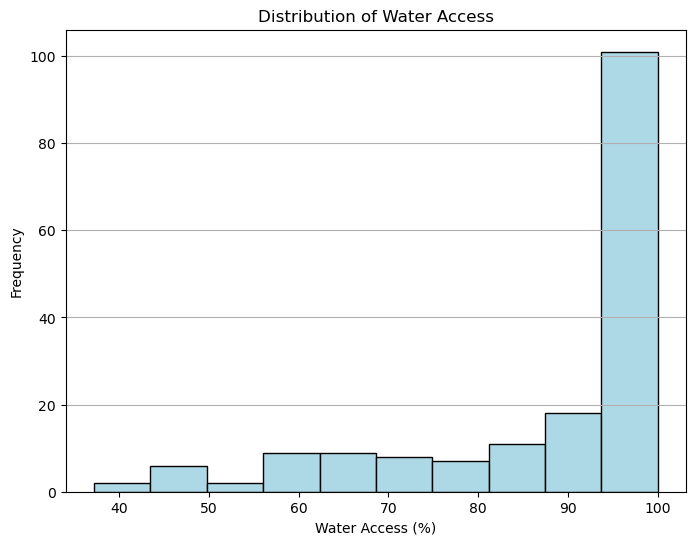

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(water, bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Water Access')
plt.xlabel('Water Access (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()

The histogram displays the distribution of water access across various populations. It shows that most populations have high water access, clustering around the upper end (85-100%). However, there are some populations with significantly lower access, suggesting a negative skew in the data towards lower access levels. This indicates that while many have good access, a notable portion still struggles with water availability.

#### 2nd Plot: Boxplot

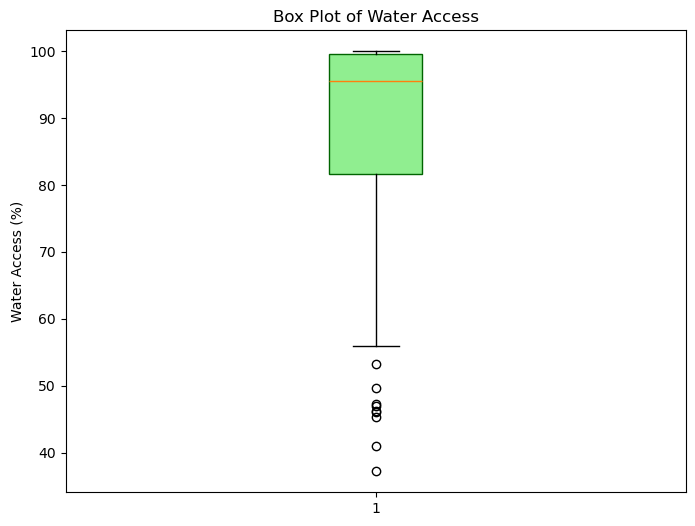

In [12]:
plt.figure(figsize=(8, 6))
plt.boxplot(water, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='darkgreen'))
plt.title('Box Plot of Water Access')
plt.ylabel('Water Access (%)')

plt.show()

The box plot provides a visual summary of the water access data, highlighting the median (the line inside the box) and the interquartile range (IQR). The IQR indicates that the middle 50% of the data is clustered at high access levels. The presence of any outliers below the lower whisker suggests that certain populations have significantly lower water access compared to the rest, reinforcing the idea of variability in access among different regions (negatively skewed).

#### 3rd Plot: Cumulative Proportion Plot

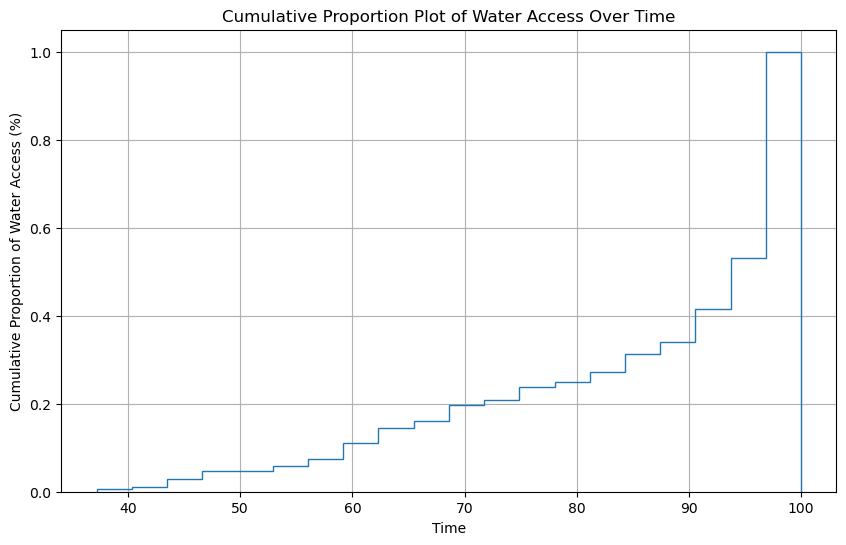

In [13]:
plt.figure(figsize=(10, 6)) 
plt.hist(sorted(water), bins=20, cumulative=True, histtype='step', density=True,)
plt.title('Cumulative Proportion Plot of Water Access Over Time') 
plt.xlabel('Time') 
plt.ylabel('Cumulative Proportion of Water Access (%)') 
plt.grid(True) 
plt.show()

The cumulative proportion plot visualizes time to cumulative proportion of water access. It shows that data towards lower access levels results in a negative skew. The upward movement confirms that water access accumulates over time, reflecting growth or progress.

#### Scatter Plot of Water Access and Life Expectancy:

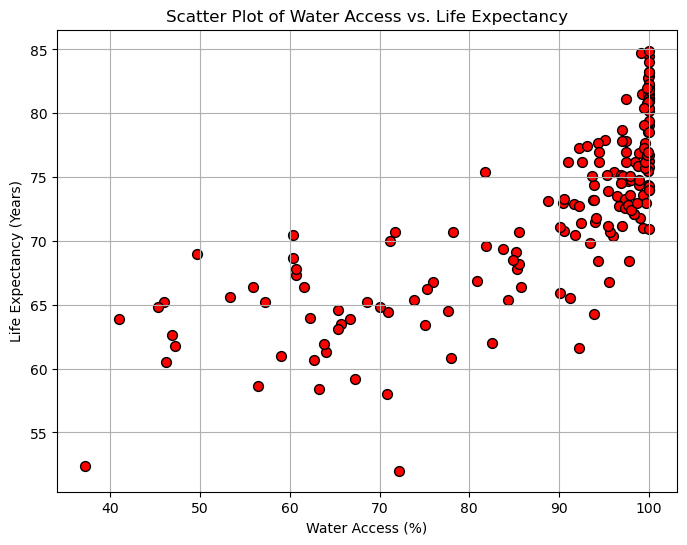

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(water, life, color='red', s=50, ec = 'k')
plt.title('Scatter Plot of Water Access vs. Life Expectancy')
plt.xlabel('Water Access (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)

plt.show()

The scatter plot reveals a positive correlation between water access and life expectancy. Populations with higher access to water tend to have longer life expectancies. This relationship suggests that access to clean and sufficient water is likely a key factor in improving life expectancy, though the scatter suggests that other factors are also at play, as the data is not perfectly linear.

## Independence

#### Two measures of dependence/independence between the two data sets

In [15]:
covariance = np.cov(water, life)[0, 1]
print(f'Covariance between Water Access and Life Expectancy: {round(covariance, 3)} years' )

Covariance between Water Access and Life Expectancy: 84.646 years


In [16]:
correlation_coefficient = np.corrcoef(water, life)[0, 1]
print(f'Correlation Coefficient between Water Access and Life Expectancy: {round(correlation_coefficient, 3)}')

Correlation Coefficient between Water Access and Life Expectancy: 0.775


#### Supporting Paragraph:

The positive covariance of 84.65 indicates that there is a tendency for countries with higher water access to also exhibit higher life expectancy. This positive relationship suggests that improvements in water access are associated with better health outcomes. The correlation coefficient of 0.775 signifies a strong positive linear relationship, suggesting that as water access increases, life expectancy tends to increase as well. This degree of correlation indicates a robust dependence between the two datasets, meaning they are significantly related to each other.

Countries that do not have access to fresh water have a lower life expectancy as water is a critical source for human life. Therefore, more water would provide higher life expectancy for everyone.

Water is also needed for agriculture, which provides food for people. Therefore, if there is more water, there is more food for people to eat, thus raising the life expectancy.

An additional factor that affects life expectancy is the availability of healthcare services: Access to hospitals, clinics, and preventive care. Regions with higher vaccination rates and disease prevention programs have lower mortality rates. Availability of cutting-edge treatments and technologies improves survival rates for chronic and acute conditions.


## Distributions

#### Density Histogram

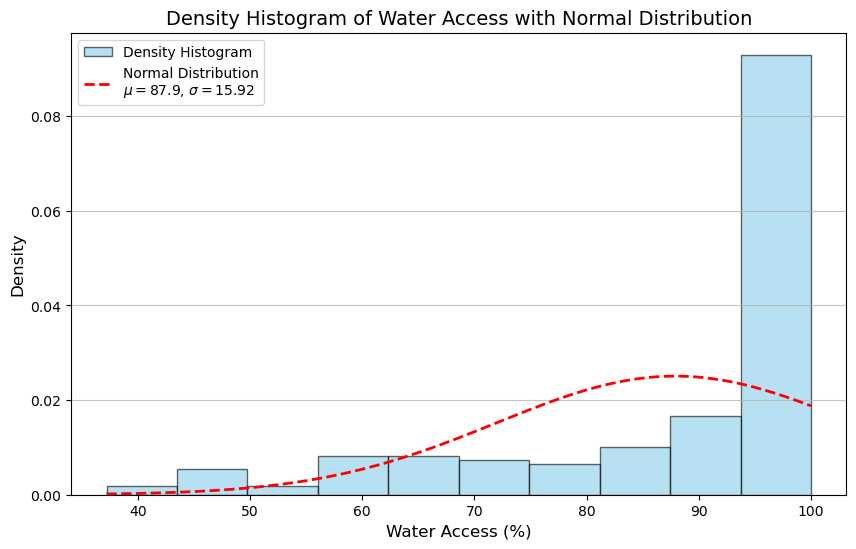

In [17]:
water_mean = np.mean(water)
water_std = np.std(water)

x_values = np.linspace(min(water), max(water), 1000)
normal_pdf = norm.pdf(x_values, loc=water_mean, scale=water_std)

plt.figure(figsize=(10, 6))
plt.hist(water, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Density Histogram')
plt.plot(x_values, normal_pdf, color='red', linestyle='--', linewidth=2, label=f'Normal Distribution\n$\mu={round(water_mean, 2)}$, $\sigma={round(water_std, 2)}$')
plt.title('Density Histogram of Water Access with Normal Distribution', fontsize=14)
plt.xlabel('Water Access (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.75)

plt.show()

#### Q-Q Plot

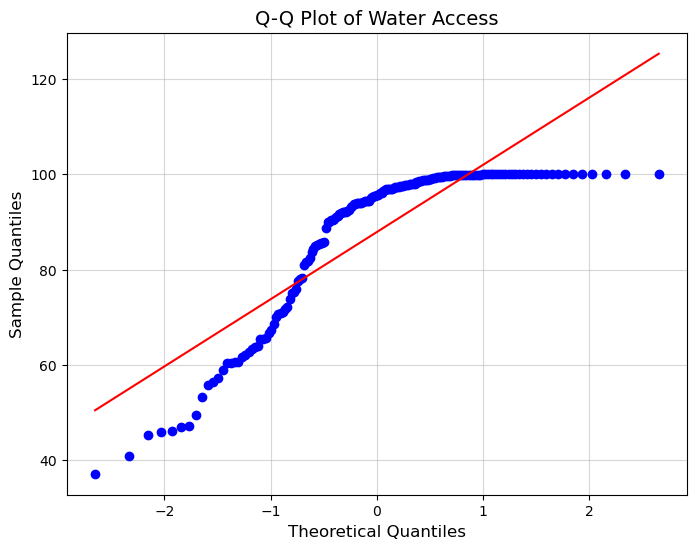

In [18]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(water, dist="norm", plot=plt)
plt.title('Q-Q Plot of Water Access', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(alpha=0.5)

plt.show()

The histogram does not show a symmetric bell shape and is not aligned with the histogram bars. There is a skewness/deviation from 85-100% water access (x-axis), therefore is not a normal distribution. For the QQ plot, the points do not follow closely to the diagonal line, so therefore this indicates that this is not a good fit to a normal distribution. The ranges of theoretical quantiles for the QQ plot that shows discrepancy is from -0.5 to 3.

Since both of these plots demonstrate that it is not a normal distribution due to skewness and having heavier/lighter tails, other alternative distributions (e.g., log-normal or exponential) might better represent this data. 

## Confidence Interval Estimation for Mean Using Boostrapping

Population Mean of Water Access: 87.902
Sample: [97.9, 99.5, 99.9, 65.7, 37.2, 99.9, 99.4, 83.7, 73.8, 96.7]
Point Estimate for Population Mean (Sample Mean): 85.37
95% Confidence Interval for Population Mean: (72.36, 96.14)


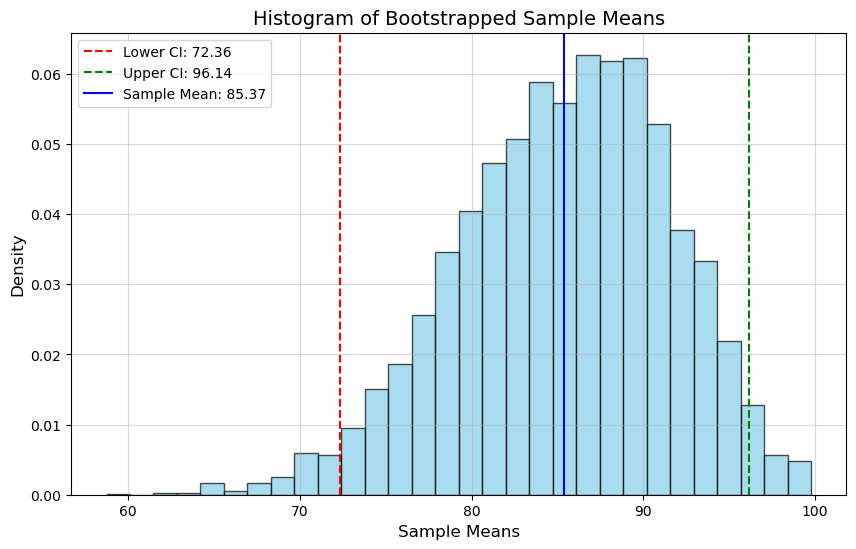

In [25]:
water_mean_population = np.mean(water)
print(f'Population Mean of Water Access: {round(water_mean_population, 3)}')

import random

random.seed(93)

sample = random.sample(list(water), 10)
print(f'Sample: {sample}')

sample_mean = np.mean(sample)
print(f'Point Estimate for Population Mean (Sample Mean): {round(sample_mean, 3)}')

boot_means = []
n_iterations = 5000
for _ in range(n_iterations):
    boot_sample = random.choices(sample, k=len(sample))
    boot_means.append(np.mean(boot_sample))

lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

print(f'95% Confidence Interval for Population Mean: ({round(lower_bound, 3)}, {round(upper_bound, 3)})')

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(boot_means, bins=30, color='skyblue', alpha=0.7, edgecolor='black', density=True)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower CI: {round(lower_bound, 3)}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper CI: {round(upper_bound, 3)}')
plt.axvline(sample_mean, color='blue', linestyle='-', label=f'Sample Mean: {round(sample_mean, 3)}')
plt.title('Histogram of Bootstrapped Sample Means', fontsize=14)
plt.xlabel('Sample Means', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()


The population mean of water access is 87.902, which is in the 95% confidence interval for population mean (72.36, 96.14). Therefore, the sample and the bootstrapping procedure effectively captured the central tendency of the population. If the sample is representative and randomness is properly controlled, the bootstrapped CI should generally include the population mean. If the sample size were increased to 40, the confidence interval would likely be narrower and still centered around the true population mean. This is due to the reduction in standard error and increased precision associated with a larger sample size.

## Hypothesis Testing for Mean

### Hypotheses


$H_0: \mu = 85$ (Null hypothesis: the population mean is 85)

$H_1: \mu \neq 85$ (Alternative hypothesis: the population mean is not 85)



**Rationale for choosing \( a = 85 \):**  
The value of 85 was chosen as a hypothetical population mean based on being reasonably close to the sample mean. This allows us to test whether the sample mean is significantly different from this hypothetical value.


In [26]:
a = 85

test_statistic, p_value = ttest_1samp(sample, a)

print(f'Test Statistic: {round(test_statistic, 3)}')
print(f'P-Value: {round(p_value, 3)}')

Test Statistic: 0.056
P-Value: 0.957


Since the p-value is 0.957, we fail to reject H_0, concluding that there is not enough evidence to suggest that the mean is different from 85.

The significance level that would change our conclusion compared to the 0.05 level would be alpha = 0.97. Therefore, since 0.957 is smaller than 0.97, we would reject H_0 (null hypothesis). Based on the bootstrapped confidence interval from Section 6 which was 72.36, 96.14, the mean of 85 is within the interval so we fail to reject H_0 since alpha lies within the interval.

When comparing the conclusion based on the p-value with the bootstrapped confidence intervals, they both display the same result/conclusion that we fail to reject the null hypothesis. Confidence intervals from bootstrapping would be more appropriate since it provides more intuitive information by showing the range of plausible values for the population mean and directly incorporates the sample distribution. Python functions may not be as robust for smaller samples as well.

If the sample size was 40, the p-value would likely decrease because a larger sample size provides more precise estimates, increasing the test statistic. This would make it easier to reject the null hypothesis.

## Linear Regression

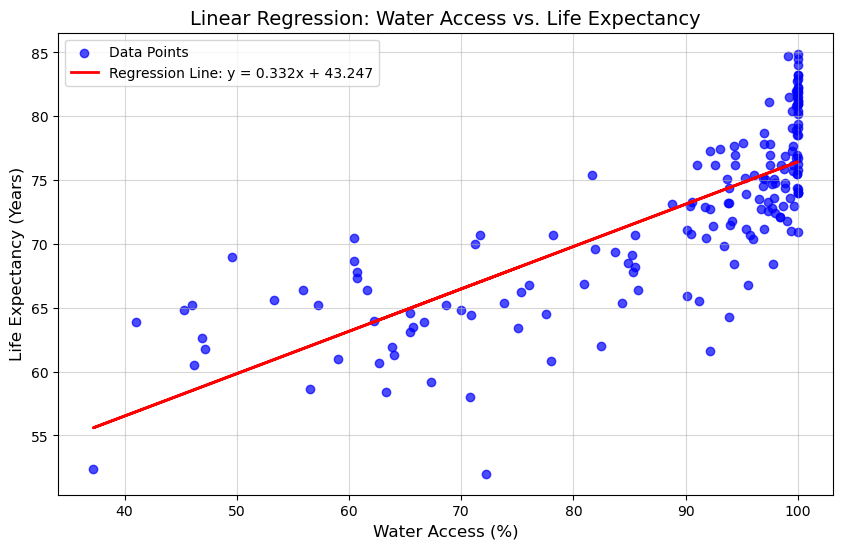

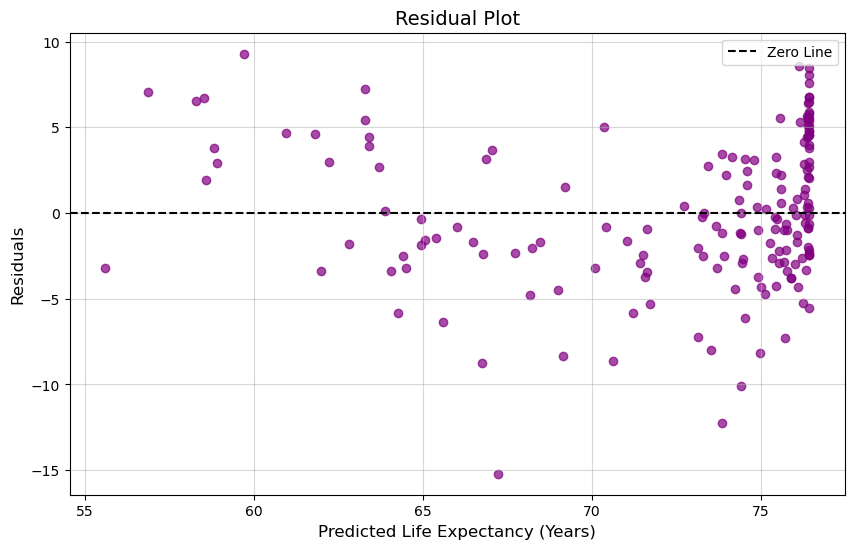

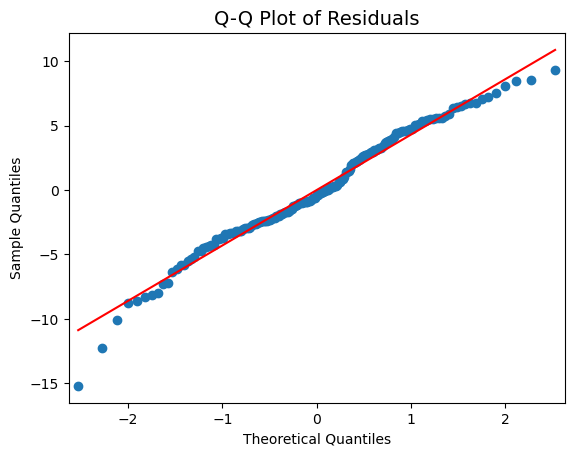

(0.3318692905393167, 43.246997178263335, 0.6011354283626911)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

X = np.array(water).reshape(-1, 1)
Y = np.array(life)

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_

Y_pred = model.predict(X)

r_squared = r2_score(Y, Y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.7, label='Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label=f'Regression Line: y = {round(slope, 3)}x + {round(intercept, 3)}')
plt.title('Linear Regression: Water Access vs. Life Expectancy', fontsize=14)
plt.xlabel('Water Access (%)', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()

residuals = Y - Y_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1.5, label='Zero Line')
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Predicted Life Expectancy (Years)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals', fontsize=14)
plt.show()

slope, intercept, r_squared

In [28]:
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {round(slope, 3)}')
print(f'Intercept: {round(intercept, 3)}')

r_squared = r2_score(Y, Y_pred)
print(f'Coefficient of Determination (R^2): {r_squared}')

Slope: 0.332
Intercept: 43.247
Coefficient of Determination (R^2): 0.6011354283626911


This means that 60.1% of the variance in life expectancy can be explained by water access. The remaining 39.9% is due to other factors or random variation. An R^2 value above 0.6 suggests a moderately strong relationship, which is a reasonable fit for this model.

##### Assumptions of Linear Regression Model:

Linearity: The relationship between the independent and dependent variables should be linear. This is shown in the scatter plot of the data and a fitted regression line (see above).

Homoscedasticity: The variance of residuals should be constant. Look at the residual plot above.

Normality of residuals: Residuals should be normally distributed. This is shown in the QQ plot above.

## Open Exploration

##### Research Question: Does both water access and life expectancy have a stronger correlation with the country's GDP?

This question aims to explore the relationships between GDP and two key development indicators: water access and life expectancy. The hypothesis is that both water access and life expectancy are positively correlated with GDP, but one may have a stronger correlation than the other. This analysis will help understand how economic development relates to these crucial aspects of human well-being and whether investments in one area might have a more significant impact on a country's overall development.

##### Data Integration:
Add GDP data from the provided data list to the existing dataset containing water access and life expectancy information.
Ensure that the GDP data aligns correctly with the corresponding countries in the water access and life expectancy dataset.

##### Correlation Analysis:
Calculate the correlation coefficients between:
a) GDP and water access
b) GDP and life expectancy
Compare these correlation coefficients to determine which relationship is stronger.

##### Visualization:
Plot scatter plots for both GDP vs Water Access and GDP vs Life Expectancy to identify trends.
Use appropriate scales (e.g., logarithmic scale for GDP if necessary) to better visualize the relationships.
Add trend lines or smoothed curves to the scatter plots to highlight the overall patterns.

##### Hypothesis Testing:
Conduct a one-sample t-test to compare the mean of the correlation coefficients (GDP vs Water Access, GDP vs Life Expectancy, and Water Access vs Life Expectancy) against the correlation coefficient of Water Access and Life Expectancy (0.775).
Calculate the sample mean and standard deviation of the three correlation coefficients.
Perform a one-sample t-test to determine if the sample mean is significantly different from 0.775.
Calculate the t-statistic and p-value to assess the statistical significance of the difference.

##### Interpretation:
Analyze the results of the t-test in the context of existing literature on economic development, water access, and life expectancy.
Consider the implications of the findings for policy-making and development strategies, particularly if the average correlation with GDP is significantly different from the Water Access-Life Expectancy correlation.
Discuss potential causal mechanisms that might explain the observed relationships and why the correlations with GDP might differ from the Water Access-Life Expectancy correlation.

By following these steps, we can gain a comprehensive understanding of how GDP relates to water access and life expectancy, and whether these relationships are, on average, significantly different from the relationship between water access and life expectancy. This analysis can provide valuable insights for prioritizing development efforts and understanding the complex interplay between economic growth and human well-being indicators.

In [23]:
dz = pd.read_csv("CE93_02_Water_Expectancy_29.csv")
gdp = dz["GDP(Billion $)"]
water = dz['Water_Access(%)']
life = dz['Life_Expectancy(yr)']

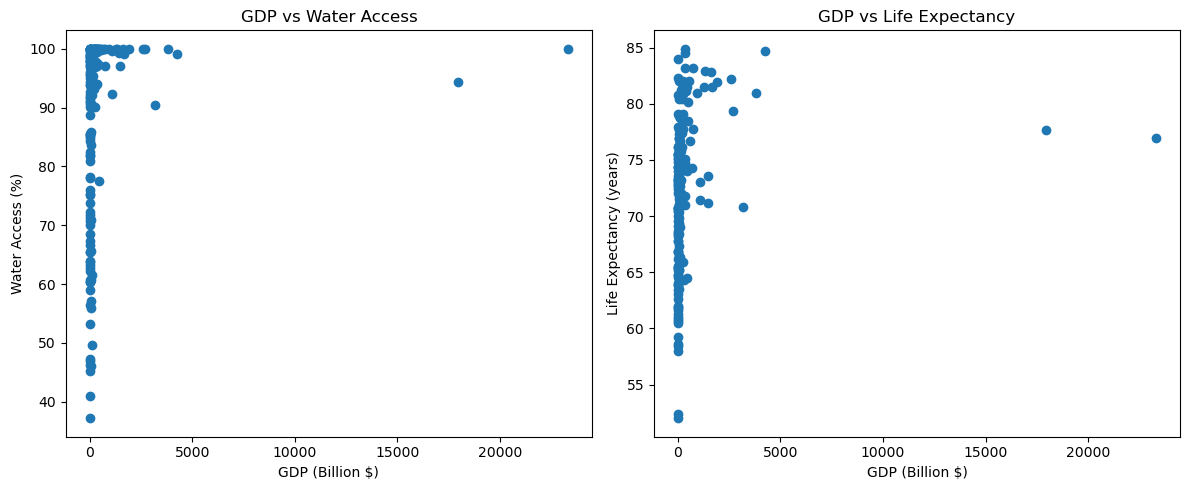

Correlation between GDP and Water Access: 0.1325
Correlation between GDP and Life Expectancy: 0.1743
Correlation between Water Access and Life Expectancy: 0.7753
Sample Mean: 85.3700
Test Statistic: -1.995
P-Value: 0.184


In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(gdp, water)
plt.xlabel('GDP (Billion $)')
plt.ylabel('Water Access (%)')
plt.title('GDP vs Water Access')

plt.subplot(1, 2, 2)
plt.scatter(gdp, life)
plt.xlabel('GDP (Billion $)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP vs Life Expectancy')

plt.tight_layout()
plt.show()

corr_gdp_water = np.corrcoef(gdp, water)[0, 1]
corr_gdp_life = np.corrcoef(gdp, life)[0, 1]
corr_water_life = np.corrcoef(water, life)[0, 1]

print(f"Correlation between GDP and Water Access: {corr_gdp_water:.4f}")
print(f"Correlation between GDP and Life Expectancy: {corr_gdp_life:.4f}")
print(f"Correlation between Water Access and Life Expectancy: {corr_water_life:.4f}")
print(f"Sample Mean: {sample_mean:.4f}")

sample = [corr_gdp_water, corr_gdp_life, corr_water_life]
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

a = 0.775

test_statistic, p_value = ttest_1samp(sample, a)

print(f'Test Statistic: {round(test_statistic, 3)}')
print(f'P-Value: {round(p_value, 3)}')

GDP has a stronger correlation with Life Expectancy (0.1743) compared to Water Access (0.1325). The t-test results show a p-value of 0.184, which is much greater than the typical significance level of 0.05. This means we fail to reject the null hypothesis. The negative t-statistic (-1.995) indicates that the sample mean (0.1534, which is the average of the correlations between GDP and Water Access, and GDP and Life Expectancy) is lower than the correlation coefficient between Water Access and Life Expectancy (0.7753).

Conclusion:
Based on these results, we can conclude that Water Access and Life Expectancy have a stronger correlation with each other compared to their individual correlations with GDP. The hypothesis test suggests that the average correlation of GDP with Water Access and Life Expectancy is not significantly greater than the correlation between Water Access and Life Expectancy. In fact, it appears to be lower. This implies that while GDP does have weak to moderate correlations with both Water Access and Life Expectancy, the relationship between Water Access and Life Expectancy is particularly strong. This underscores the importance of water access in relation to life expectancy, potentially more so than economic factors represented by GDP. The data suggests that improving water access could have a more direct and substantial impact on life expectancy compared to changes in GDP.

## Conclusion

 The analysis conducted reveals a strong positive correlation (r = 0.776) between water access and life expectancy, suggesting that increased access to safe drinking water is associated with longer lives. However, the distribution of water access is skewed, with most countries achieving high access and a few significant outliers with poor access, likely due to poverty, conflict, or environmental challenges. The hypothesis test failed to reject the null hypothesis that the mean water access is 85%, possibly due to high variability and outliers. While water access directly impacts health by reducing waterborne diseases, it is also interdependent with factors like GDP, healthcare access, and availability of education. Future research conducted could explore these connections through alternate data analysis methods, while focusing more on regional disparities and outliers to gain deeper insights.
